In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [60]:
df = pd.read_csv('../data/train_dataset_train.csv')
df.head()

/tmp/ipykernel_12554/3621743532.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train_dataset_train.csv')


,id,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,...,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label
0,6818780,1043_-1,628629.0,Участок,7503.0,N,0.0,Y,N,87.0,...,42.0,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0
1,9907176,1023_-1,102976.0,ММПО,7503.0,N,0.0,N,N,107.0,...,914.0,48856658.0,83318932.0,132175590.0,136819803.0,0,0,0,0,0
2,3304275,1018_-1,620962.0,Цех,7503.0,N,0.0,Y,N,50.0,...,62.0,3246292.0,3233068.0,6479360.0,52708071.0,0,1,0,0,0
3,9020937,1019_-1,344964.0,Цех,7503.0,N,0.0,Y,N,416.0,...,55.0,2060928.0,653280.0,2714208.0,19562334.0,0,0,0,0,0
4,3082311,1020_-1,629819.0,Участок,7503.0,N,0.0,Y,N,795.0,...,16.0,316919.0,27911.0,344830.0,4719186.0,0,0,0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   oper_type + oper_attr          object 
 2   index_oper                     object 
 3   type                           object 
 4   priority                       float64
 5   is_privatecategory             object 
 6   class                          float64
 7   is_in_yandex                   object 
 8   is_return                      object 
 9   weight                         float64
 10  mailtype                       float64
 11  mailctg                        float64
 12  mailrank                       float64
 13  directctg                      float64
 14  transport_pay                  float64
 15  postmark                       float64
 16  name_mfi                       object 
 17  weight_mfi                     float64
 18  pr

In [62]:
df.isnull().sum()

id                               0
oper_type + oper_attr            0
index_oper                       0
type                             0
priority                         0
is_privatecategory               0
class                            0
is_in_yandex                     0
is_return                        0
weight                           0
mailtype                         0
mailctg                          0
mailrank                         0
directctg                        0
transport_pay                    0
postmark                         0
name_mfi                         0
weight_mfi                       0
price_mfi                        0
dist_qty_oper_login_1            0
total_qty_oper_login_1           0
total_qty_oper_login_0           0
total_qty_over_index_and_type    0
total_qty_over_index             0
is_wrong_sndr_name               0
is_wrong_rcpn_name               0
is_wrong_phone_number            0
is_wrong_address                 0
label               

In [63]:
duplicates = df.duplicated(subset=['id'], keep=False)
duplicates.sum()

0

In [64]:
del duplicates

In [65]:
df.drop('id', axis=1, inplace=True)

In [105]:
numeric_col = []

In [66]:
df['oper_type + oper_attr'].value_counts()

1020_-1    693154
1022_-1    656597
1019_-1    413710
8_0        402877
1_-1       359402
            ...  
2_2             1
12_6            1
2_11            1
2_10            1
1009_-1         1
Name: oper_type + oper_attr, Length: 109, dtype: int64

In [67]:
df['oper_type'] = df['oper_type + oper_attr'].apply(lambda x: x.split('_')[0])
df['oper_attr'] = df['oper_type + oper_attr'].apply(lambda x: x.split('_')[1])
df['oper_type'] = df['oper_type'].astype(int)
df['oper_attr'] = df['oper_attr'].astype(int)
df.drop('oper_type + oper_attr', axis=1, inplace=True)

In [68]:
df['oper_type'].value_counts()

8       879194
1020    693154
1022    656597
1019    413710
1       359402
1001    353113
1018    317883
1004    309433
1042    293434
1041    289924
1023    214907
2       141763
1043    139437
1044    133987
1014    105358
1016     74538
11       74451
14       72218
9        70931
0        69355
184      58120
185      58036
183      58008
39       57665
29       41486
1026     21573
12        7646
131       6517
1017      5641
1027      4602
26        4156
1025      3417
1021      2647
4         2261
154        998
41         992
1015       666
1012       548
114        465
1045       435
6          397
30         341
3          299
104        141
1005        69
1002        26
1013        24
1003        14
20           8
5            4
15           2
10           2
34           1
24           1
128          1
192          1
1009         1
Name: oper_type, dtype: int64

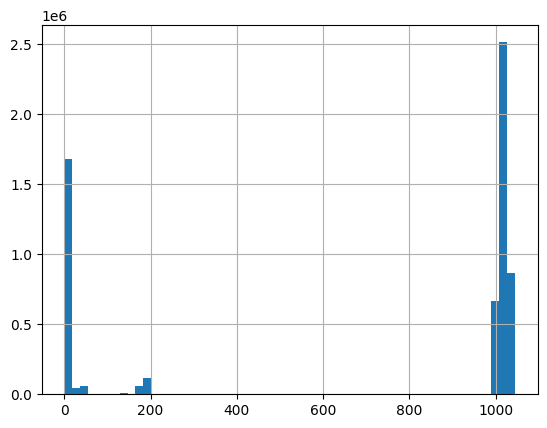

In [69]:
df['oper_type'].hist(bins=df['oper_type'].unique().shape[0]);

In [70]:
df['oper_attr'].value_counts()

-1       4891634
 0        403151
 1        182752
 6        158135
 2        143043
 3        117230
 13        69600
 10         9827
 5          8630
 1001       4579
 4          3347
 20         2222
 9          1655
 1000       1454
 18         1073
 21          666
 8           489
 182         373
 16          107
 11           12
 22            5
 15            5
 17            4
 19            4
 51            1
 7             1
 1002          1
Name: oper_attr, dtype: int64

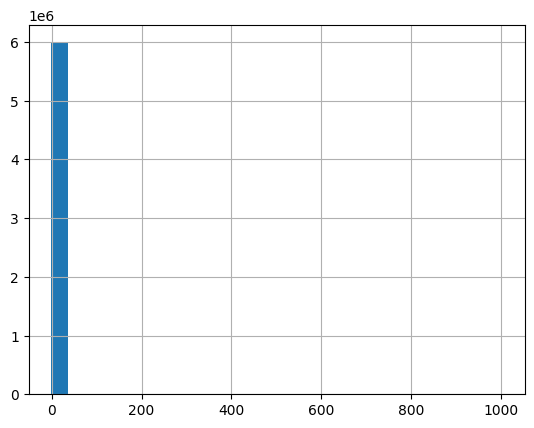

In [71]:
df['oper_attr'].hist(bins=df['oper_attr'].unique().shape[0]);

In [72]:
df['index_oper'].value_counts()

102976      938416
102976.0    661191
102971      476859
102971.0    341402
620984       80811
             ...  
347566.0         1
397724           1
353710.0         1
668412           1
164553.0         1
Name: index_oper, Length: 38661, dtype: int64

In [73]:
drop_index = list()
values_int = list()
for idx, value in enumerate(df['index_oper']):
    try:
        values_int.append(int(float(value)))
    except:
        drop_index.append(idx)

In [74]:
len(drop_index)

154

In [75]:
df.drop(drop_index, inplace=True)

In [76]:
df['index_oper'] = values_int
df['index_oper'].value_counts()

102976    1611563
102971     831679
620984     136389
102998     107961
102968      98751
           ...   
188361          1
646728          1
678431          1
658598          1
422418          1
Name: index_oper, Length: 20686, dtype: int64

In [77]:
df['type'].value_counts()

Цех               2093668
ММПО              1614974
Участок            926631
ГОПС               463750
ТИ                 305490
П                  245814
МСЦ                223241
СОПС                72161
СЦ                  12469
ОП                   9527
МСО                  7465
ОПП                  7190
АОПП                 6682
МРП                  3850
0                    3290
АО                   1304
ПЕРЕДВИЖНОЕ ОС       1006
ППС                   682
УМСЦ                  569
УКД                    83
Name: type, dtype: int64

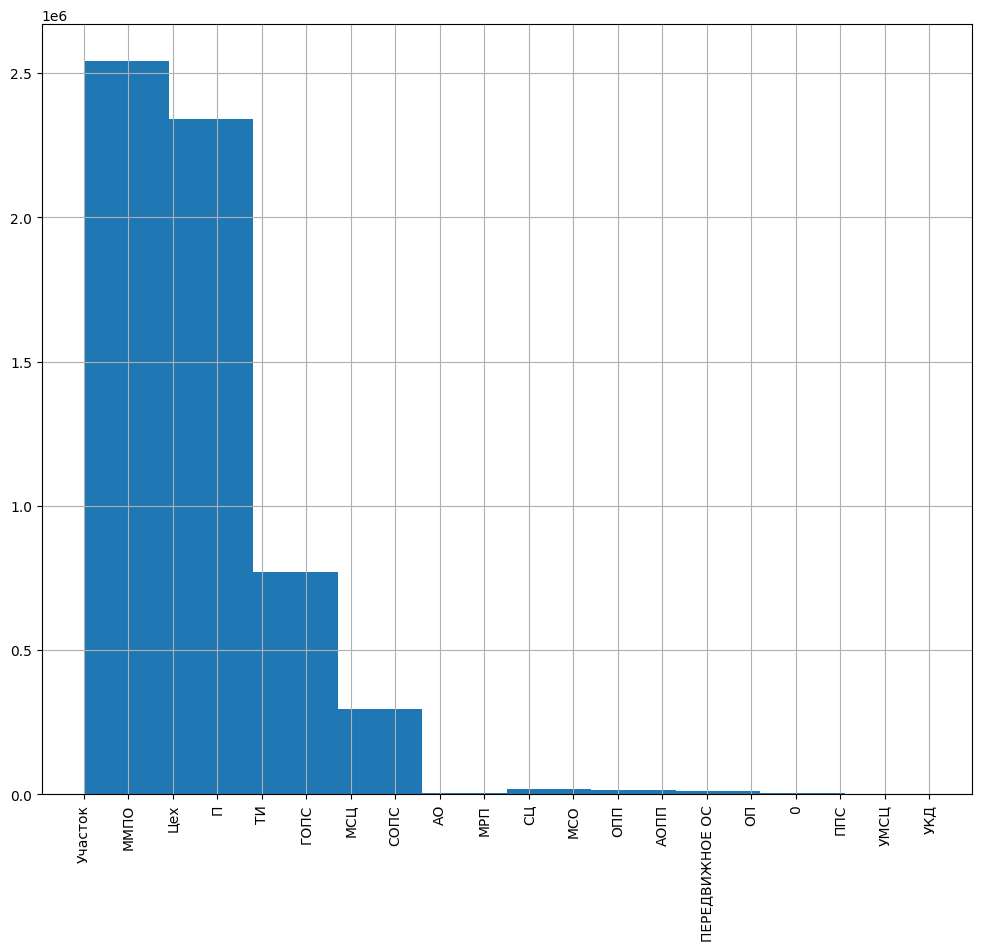

In [78]:
df['type'].hist(figsize=(12, 10), xrot=90);

In [79]:
enc = LabelEncoder()
type_new = enc.fit_transform(df['type'])

In [81]:
len(list(enc.classes_))

20

In [83]:
classes = list(enc.classes_)
idx_classes = enc.transform(classes)

new_type_with_idx = dict()
for classes, idx_classes in zip(classes, idx_classes):
    new_type_with_idx[classes] = idx_classes
new_type_with_idx

{'0': 0,
 'АО': 1,
 'АОПП': 2,
 'ГОПС': 3,
 'ММПО': 4,
 'МРП': 5,
 'МСО': 6,
 'МСЦ': 7,
 'ОП': 8,
 'ОПП': 9,
 'П': 10,
 'ПЕРЕДВИЖНОЕ ОС': 11,
 'ППС': 12,
 'СОПС': 13,
 'СЦ': 14,
 'ТИ': 15,
 'УКД': 16,
 'УМСЦ': 17,
 'Участок': 18,
 'Цех': 19}

In [84]:
type_new

array([18,  4, 19, ..., 19, 19, 13])

In [86]:
df['type'] = type_new
df['type'].value_counts()

19    2093668
4     1614974
18     926631
3      463750
15     305490
10     245814
7      223241
13      72161
14      12469
8        9527
6        7465
9        7190
2        6682
5        3850
0        3290
1        1304
11       1006
12        682
17        569
16         83
Name: type, dtype: int64

In [87]:
df['priority'].value_counts()

7503.0    3990518
7506.0    1744627
7504.0     261583
0.0          3118
Name: priority, dtype: int64

In [88]:
df['priority'] = df['priority'].astype(int)

In [89]:
df['is_privatecategory'].value_counts()

N    5994524
Y       2806
0       2516
Name: is_privatecategory, dtype: int64

In [92]:
df['is_privatecategory'].replace({'N': 1, 'Y': 2, '0': 0}, inplace=True)
df['is_privatecategory'].value_counts()

1    5994524
2       2806
0       2516
Name: is_privatecategory, dtype: int64

In [93]:
df['class'].value_counts()

0.0    5214691
3.0     371753
2.0     150393
4.0     131468
1.0     114117
5.0      17424
Name: class, dtype: int64

In [94]:
df['class'] = df['class'].astype(int)

In [95]:
df['is_in_yandex'].value_counts()

N    3585956
Y    2411374
0       2516
Name: is_in_yandex, dtype: int64

In [96]:
df['is_in_yandex'].replace({'N': 1, 'Y': 2, '0': 0}, inplace=True)
df['is_in_yandex'].value_counts()

1    3585956
2    2411374
0       2516
Name: is_in_yandex, dtype: int64

In [97]:
df['is_return'].value_counts()

N    5992863
Y       6983
Name: is_return, dtype: int64

In [98]:
df['is_return'].replace({'N': 1, 'Y': 2}, inplace=True)
df['is_return'].value_counts()

1    5992863
2       6983
Name: is_return, dtype: int64

In [101]:
df['weight'].unique().shape

(2809,)

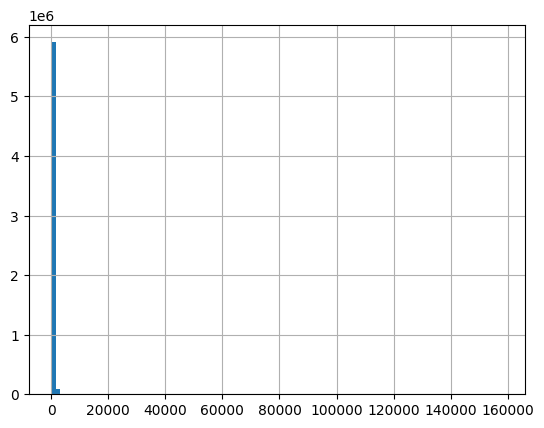

In [103]:
df['weight'].hist(bins=100);

In [106]:
numeric_col.append('weight')

In [104]:
df['mailtype'].value_counts()

5.0    5992548
0.0       5239
2.0       1470
7.0        462
4.0         84
1.0         20
8.0         19
6.0          2
9.0          2
Name: mailtype, dtype: int64

In [107]:
df['mailtype'] = df['mailtype'].astype(int)

In [108]:
df['mailctg'].value_counts()

 1.0    4688163
 0.0    1257102
-1.0      54015
 3.0        546
 5.0         20
Name: mailctg, dtype: int64

In [109]:
df['mailctg'] = df['mailctg'].astype(int)

In [110]:
df['mailrank'].value_counts()

0.0    5999846
Name: mailrank, dtype: int64

In [111]:
df.drop('mailrank', axis=1, inplace=True)

In [112]:
df['directctg'].value_counts()

2.0    5930331
1.0      69360
0.0        155
Name: directctg, dtype: int64

In [113]:
df['directctg'] = df['directctg'].astype(int)

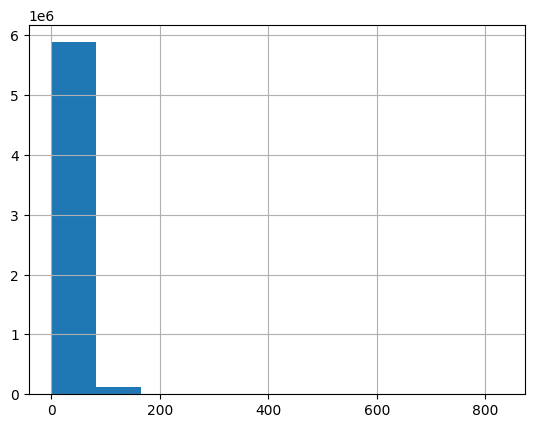

In [115]:
df['transport_pay'].hist();

In [116]:
numeric_col.append('transport_pay')

In [117]:
df['postmark'].value_counts()

0.0       5998832
512.0         901
1024.0         79
8.0            23
256.0           7
1.0             4
Name: postmark, dtype: int64

In [118]:
df['postmark'] = df['postmark'].astype(int)

In [120]:
df['name_mfi'].value_counts()

0                                                                           815368
Mobile Phone Bags & Cases                                                    48162
Screen Protectors                                                            45031
phone case                                                                   42696
Phone Case                                                                   25031
                                                                             ...  
Christmas product(hstx-pi),bjd wig(dabolang-15cm-7),Doll Toys                    1
BRUSH(X-DZS-2inch)                                                               1
car led light(b-ty-highlander-15/18)                                             1
iPhone glass(1005001915468400)                                                   1
Piston Rings PR-PW60-2SET(PR-PW60-2SET),Piston Rings PR-PW60-2SET(PR-PW6         1
Name: name_mfi, Length: 212934, dtype: int64

In [122]:
df['name_mfi'] = df['name_mfi'].apply(lambda text: text.lower())
df['name_mfi'].value_counts()

0                                                                           815368
phone case                                                                   76053
mobile phone bags & cases                                                    48162
screen protectors                                                            45106
necklace                                                                     29099
                                                                             ...  
nylon dart shafts stems                                                          1
watch(e0053-n01-gold),watch(e0053-n02-silver)                                    1
mobile phone bags & cases,phone cable                                            1
cellphone case,mobile phone case                                                 1
piston rings pr-pw60-2set(pr-pw60-2set),piston rings pr-pw60-2set(pr-pw6         1
Name: name_mfi, Length: 202806, dtype: int64

In [123]:
df.drop('name_mfi', axis=1, inplace=True)

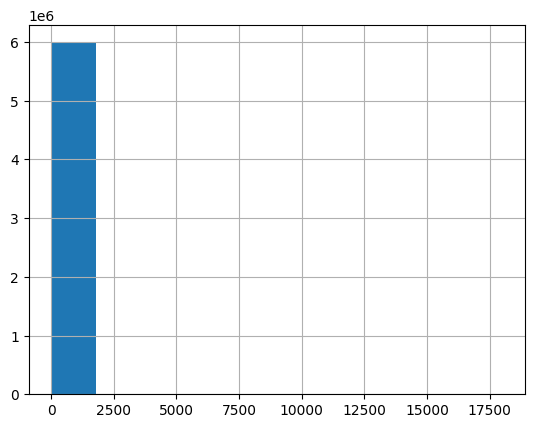

In [124]:
df['weight_mfi'].hist();

In [125]:
df['weight_mfi']

0           41.0
1           68.0
2           56.0
3           33.0
4          716.0
           ...  
5999995     24.0
5999996    100.0
5999997    952.0
5999998      0.0
5999999     40.0
Name: weight_mfi, Length: 5999846, dtype: float64

In [126]:
numeric_col.append('weight_mfi')

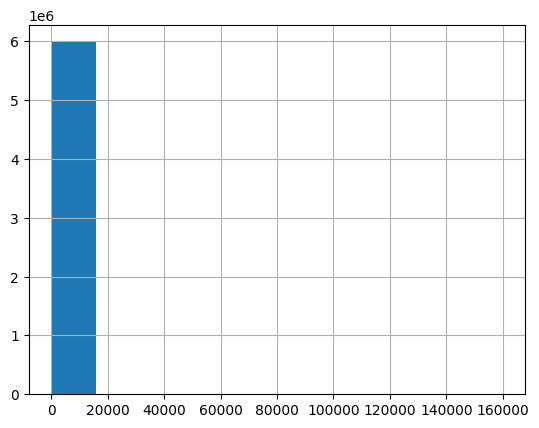

In [127]:
df['price_mfi'].hist();

In [128]:
df['price_mfi']

0           150.0
1           400.0
2           218.0
3           100.0
4          1000.0
            ...  
5999995     100.0
5999996    1832.0
5999997     800.0
5999998       0.0
5999999     400.0
Name: price_mfi, Length: 5999846, dtype: float64

In [129]:
numeric_col.append('price_mfi')

In [131]:
df['dist_qty_oper_login_1'] = df['dist_qty_oper_login_1'].astype(int)
df['dist_qty_oper_login_1'].value_counts()

914     795886
1089    334082
184     329741
972     272750
153     239368
         ...  
75           3
135          1
222          1
89           1
95           1
Name: dist_qty_oper_login_1, Length: 165, dtype: int64

In [132]:
numeric_col.append('dist_qty_oper_login_1')

In [134]:
df['total_qty_oper_login_1'].value_counts()

48856658.0    795886
64270133.0    334082
67541214.0    329741
68766046.0    272750
76138189.0    159450
               ...  
38514.0            1
106624.0           1
5791.0             1
44447.0            1
9588.0             1
Name: total_qty_oper_login_1, Length: 18374, dtype: int64

In [135]:
df['total_qty_oper_login_1'] = df['total_qty_oper_login_1'].astype('int')
numeric_col.append('total_qty_oper_login_1')

In [137]:
df['total_qty_oper_login_0'] = df['total_qty_oper_login_0'].astype('int')
numeric_col.append('total_qty_oper_login_0')

In [139]:
df['total_qty_over_index_and_type'] = df['total_qty_over_index_and_type'].astype('int')
numeric_col.append('total_qty_over_index_and_type')

In [141]:
df['total_qty_over_index'] = df['total_qty_over_index'].astype('int')
numeric_col.append('total_qty_over_index')

In [142]:
df['is_wrong_sndr_name'].value_counts()

0    5984461
1      15385
Name: is_wrong_sndr_name, dtype: int64

In [143]:
df['is_wrong_rcpn_name'].value_counts()

0    4441280
1    1558566
Name: is_wrong_rcpn_name, dtype: int64

In [144]:
df['is_wrong_phone_number'].value_counts()

0    4974030
1    1025816
Name: is_wrong_phone_number, dtype: int64

In [145]:
df['is_wrong_address'].value_counts()

0    5992269
1       7577
Name: is_wrong_address, dtype: int64

In [146]:
df['label'].value_counts()

0    5828866
1     170980
Name: label, dtype: int64

In [148]:
df[numeric_col].describe()

,weight,transport_pay,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index
count,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06
mean,2.399943e+02,1.187680e+01,1.236569e+02,4.561017e+02,3.190768e+02,2.775162e+07,2.898961e+07,5.674123e+07,7.178866e+07
std,4.504045e+02,2.224817e+01,2.084247e+02,2.103316e+03,4.012515e+02,2.903662e+07,5.334310e+07,7.290428e+07,7.509282e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,2.300000e+01,5.000000e+01,3.100000e+01,1.113900e+06,1.064800e+04,1.673370e+06,1.040204e+07
50%,1.050000e+02,0.000000e+00,6.000000e+01,1.920000e+02,1.130000e+02,9.570832e+06,3.664710e+05,1.393496e+07,5.270807e+07
75%,2.640000e+02,2.295000e+01,1.230000e+02,4.180000e+02,9.140000e+02,5.610820e+07,8.331893e+07,1.321756e+08,1.368198e+08
max,1.580000e+05,8.305000e+02,1.800000e+04,1.597050e+05,1.142000e+03,1.416888e+08,4.156581e+08,4.897385e+08,5.002511e+08


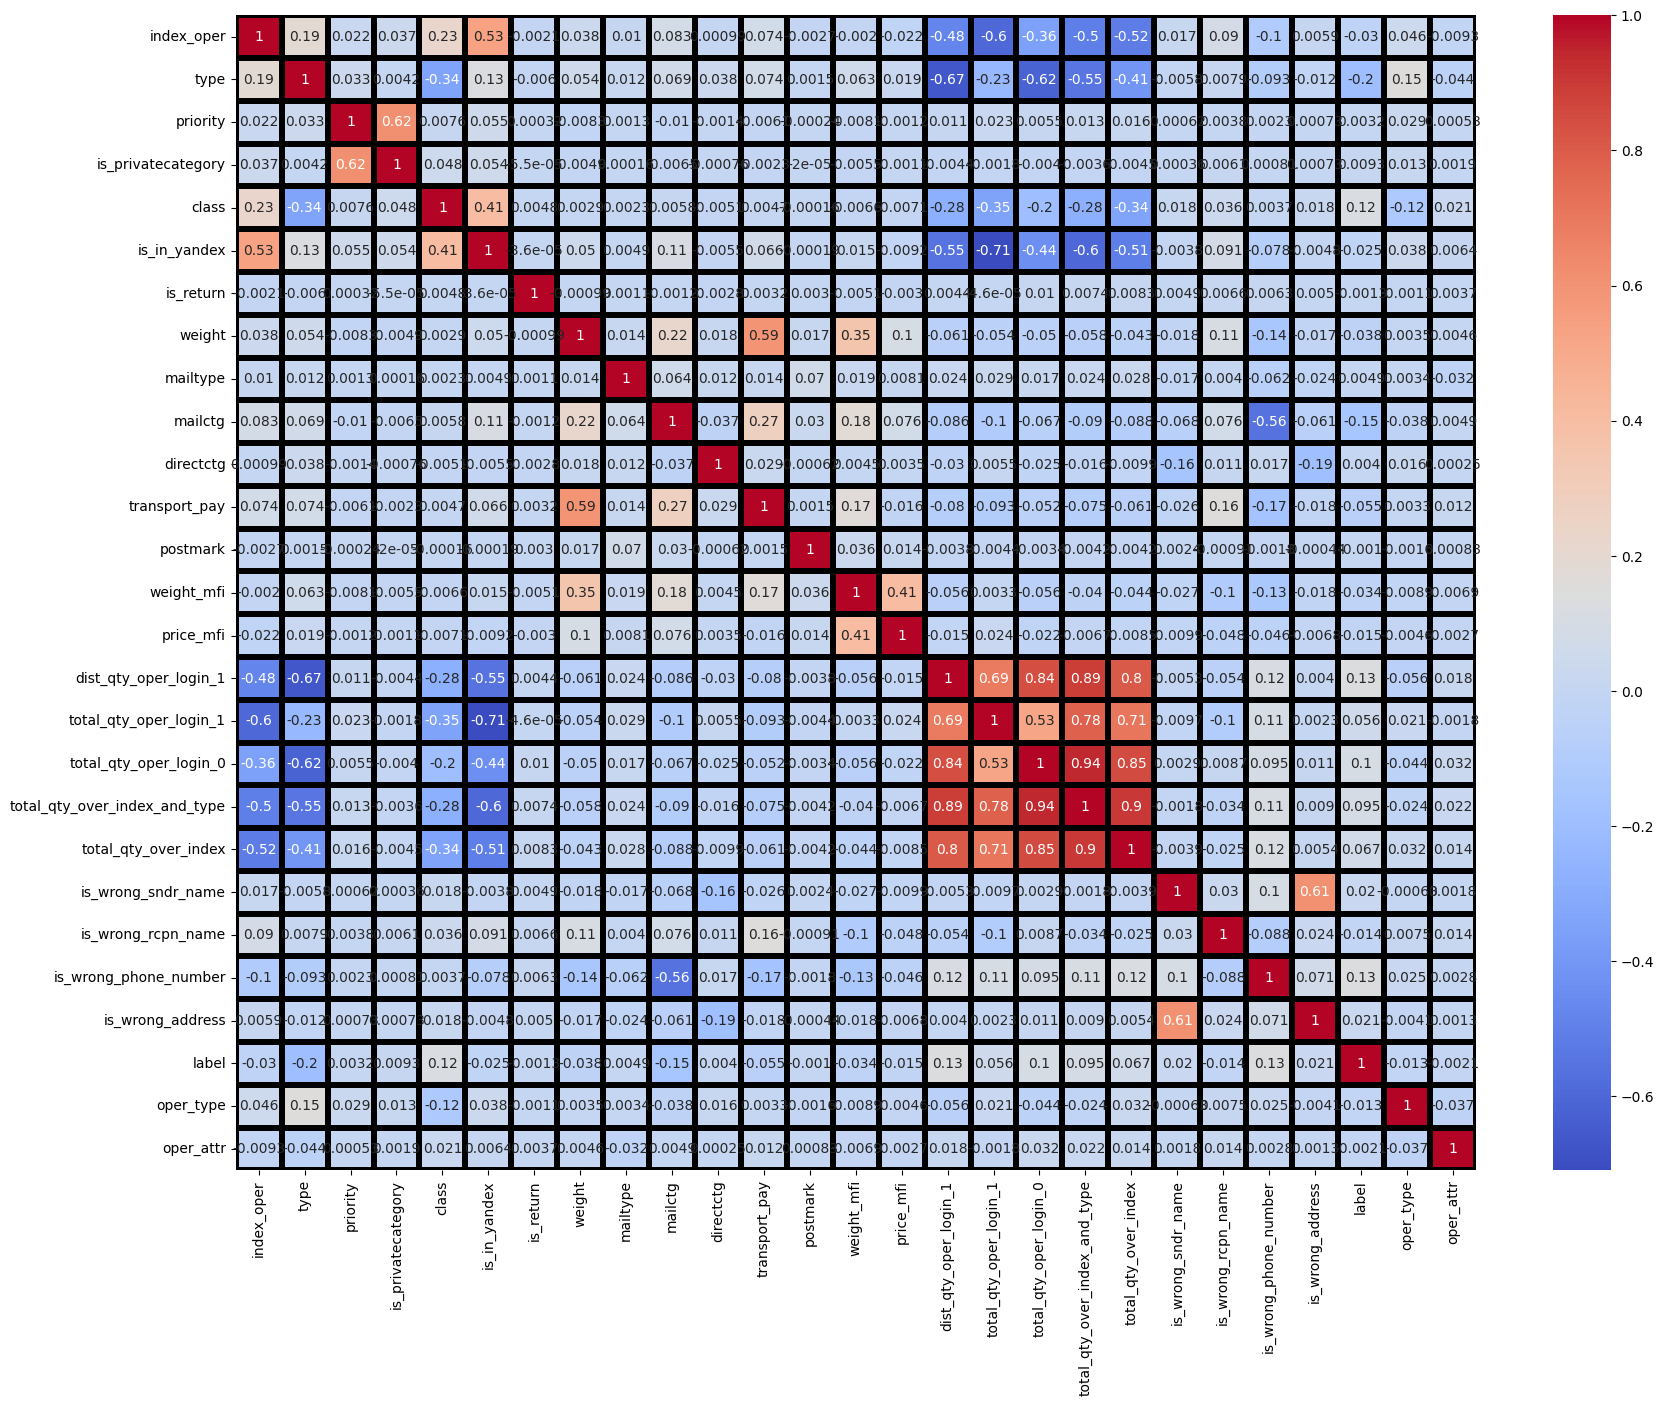

In [153]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black');

In [154]:
drop_columns = [
    'is_in_yandex', 'dist_qty_oper_login_1', 'total_qty_oper_login_1', 'total_qty_oper_login_0',
    'total_qty_over_index_and_type'
]

df.drop(drop_columns, axis=1, inplace=True)

In [156]:
numeric_col = ['weight', 'transport_pay', 'weight_mfi', 'price_mfi', 'total_qty_over_index']

In [157]:
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['index_oper', 'type', 'priority', 'is_privatecategory', 'class', 'is_return', 'weight', 'mailtype', 'mailctg', 'directctg', 'transport_pay', 'postmark', 'weight_mfi', 'price_mfi', 'total_qty_over_index', 'is_wrong_sndr_name', 'is_wrong_rcpn_name', 'is_wrong_phone_number', 'is_wrong_address', 'label', 'oper_type', 'oper_attr']


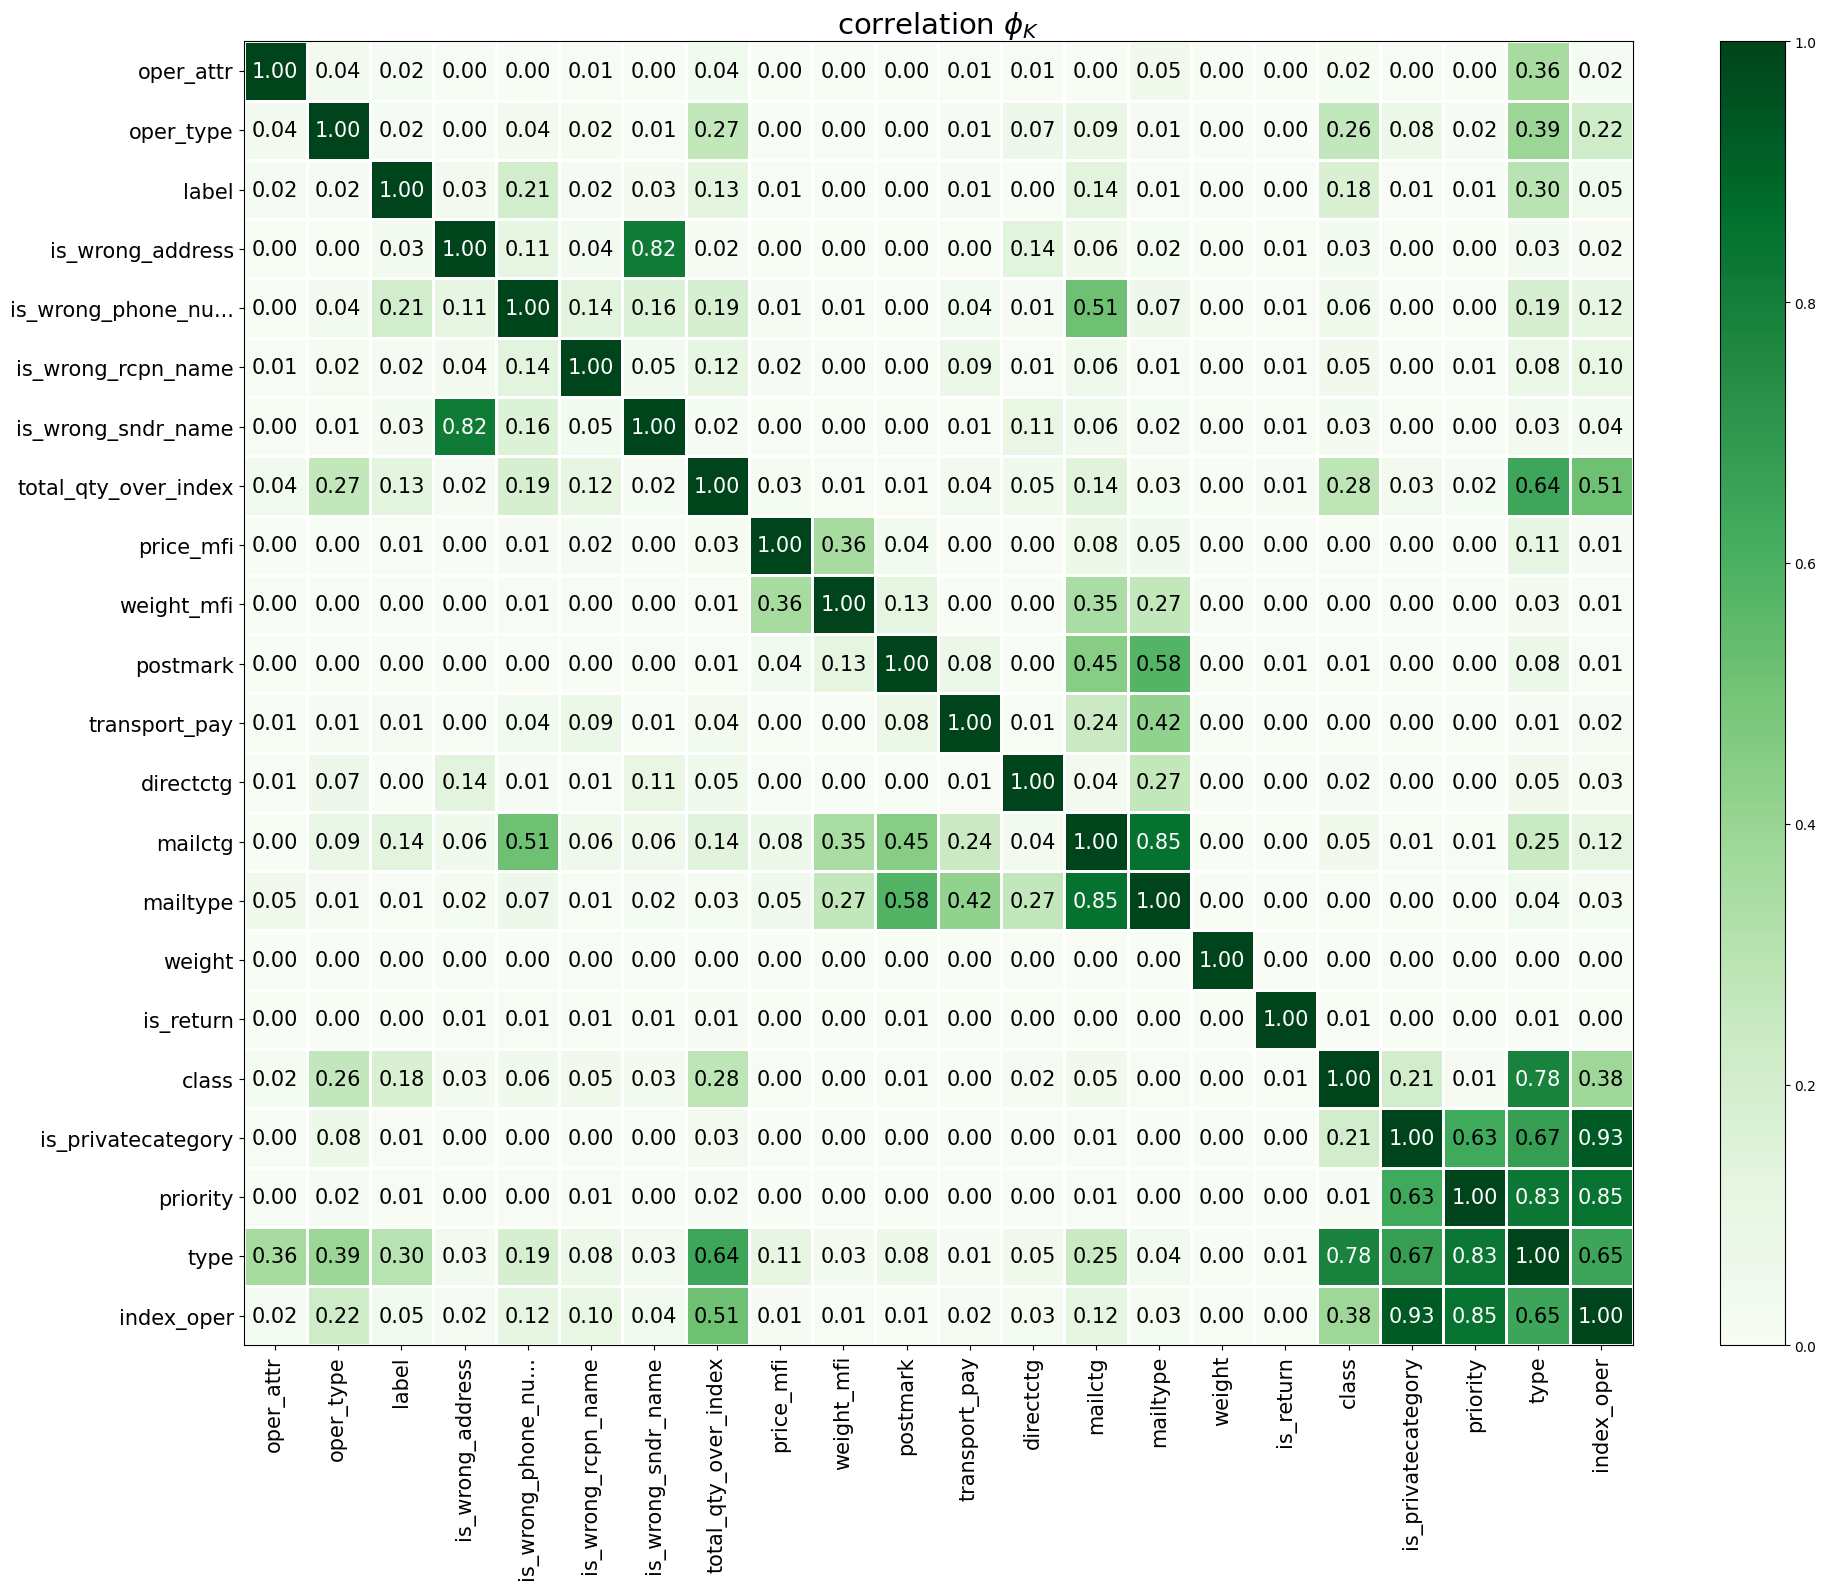

In [160]:
phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 16))
plt.tight_layout()

In [163]:
df.columns

Index(['index_oper', 'type', 'priority', 'is_privatecategory', 'class',
       'is_return', 'weight', 'mailtype', 'mailctg', 'directctg',
       'transport_pay', 'postmark', 'weight_mfi', 'price_mfi',
       'total_qty_over_index', 'is_wrong_sndr_name', 'is_wrong_rcpn_name',
       'is_wrong_phone_number', 'is_wrong_address', 'label', 'oper_type',
       'oper_attr'],
      dtype='object')

In [165]:
df

,index_oper,type,priority,is_privatecategory,class,is_return,weight,mailtype,mailctg,directctg,...,weight_mfi,price_mfi,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,oper_type,oper_attr
0,628629,18,7503,1,0,1,87.0,5,1,2,...,41.0,150.0,8290896,0,0,0,0,0,1043,-1
1,102976,4,7503,1,0,1,107.0,5,1,2,...,68.0,400.0,136819803,0,0,0,0,0,1023,-1
2,620962,19,7503,1,0,1,50.0,5,1,2,...,56.0,218.0,52708071,0,1,0,0,0,1018,-1
3,344964,19,7503,1,0,1,416.0,5,1,2,...,33.0,100.0,19562334,0,0,0,0,0,1019,-1
4,629819,18,7503,1,0,1,795.0,5,1,2,...,716.0,1000.0,4719186,0,0,0,0,0,1020,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999995,102976,4,7503,1,0,1,25.0,5,0,2,...,24.0,100.0,188407812,0,0,1,0,0,1022,-1
5999996,241963,19,7503,1,0,1,83.0,5,1,2,...,100.0,1832.0,15582018,0,0,0,0,0,1022,-1
5999997,102971,19,7506,1,0,1,1700.0,5,1,2,...,952.0,800.0,75592387,0,0,0,0,0,1041,-1
5999998,102152,19,7506,1,0,1,269.0,5,1,2,...,0.0,0.0,39988530,0,1,0,0,0,1018,-1


In [166]:
df.drop('is_privatecategory', axis=1, inplace=True)

In [167]:
df.drop('index_oper', axis=1, inplace=True)

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
df[numeric_col].describe()

,weight,transport_pay,weight_mfi,price_mfi,total_qty_over_index
count,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06
mean,2.399943e+02,1.187680e+01,1.236569e+02,4.561017e+02,7.178866e+07
std,4.504045e+02,2.224817e+01,2.084247e+02,2.103316e+03,7.509282e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,2.300000e+01,5.000000e+01,1.040204e+07
50%,1.050000e+02,0.000000e+00,6.000000e+01,1.920000e+02,5.270807e+07
75%,2.640000e+02,2.295000e+01,1.230000e+02,4.180000e+02,1.368198e+08
max,1.580000e+05,8.305000e+02,1.800000e+04,1.597050e+05,5.002511e+08


In [181]:
df['tmp'] = scaler.transform(np.array(df['weight']).reshape(-1, 1))

In [183]:
df.drop('tmp', axis=1, inplace=True)

In [176]:
df['weight']

0            87.0
1           107.0
2            50.0
3           416.0
4           795.0
            ...  
5999995      25.0
5999996      83.0
5999997    1700.0
5999998     269.0
5999999      41.0
Name: weight, Length: 5999846, dtype: float64

In [184]:
scalers = []
for col in numeric_col:
    scaler = MinMaxScaler().fit(np.array(df[col]).reshape(-1, 1))
    df[col] = scaler.transform(np.array(df[col]).reshape(-1, 1))
    scalers.append(scaler)

In [185]:
df[numeric_col].describe()

,weight,transport_pay,weight_mfi,price_mfi,total_qty_over_index
count,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06,5.999846e+06
mean,1.518951e-03,1.430078e-02,6.869829e-03,2.855901e-03,1.435052e-01
std,2.850662e-03,2.678888e-02,1.157915e-02,1.317001e-02,1.501103e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.291139e-04,0.000000e+00,1.277778e-03,3.130772e-04,2.079364e-02
50%,6.645570e-04,0.000000e+00,3.333333e-03,1.202217e-03,1.053632e-01
75%,1.670886e-03,2.763396e-02,6.833333e-03,2.617326e-03,2.735022e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [186]:
df.shape

(5999846, 20)

In [187]:
df.to_csv('../data/train_dataset_train_preprocess.csv', index=False)

In [190]:
category_col = [col for col in df.columns if col not in numeric_col]
category_col

['type',
 'priority',
 'class',
 'is_return',
 'mailtype',
 'mailctg',
 'directctg',
 'postmark',
 'is_wrong_sndr_name',
 'is_wrong_rcpn_name',
 'is_wrong_phone_number',
 'is_wrong_address',
 'label',
 'oper_type',
 'oper_attr']

In [191]:
len(category_col) + len(numeric_col) == df.shape[1]

True

**Числовые поля**:
- weight	
- transport_pay	
- weight_mfi	
- price_mfi	
- total_qty_over_index

**Категориальные поля**
- type
- priority
- class
- is_return
- mailtype
- mailctg
- directctg
- postmark
- is_wrong_sndr_name
- is_wrong_rcpn_name
- is_wrong_phone_number
- is_wrong_address
- label
- oper_type
- oper_attr